In [26]:
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, START, END
from typing import TypedDict,Annotated, Literal
import operator
from dotenv import load_dotenv
from pydantic import BaseModel,Field
load_dotenv()
from langgraph.checkpoint.memory import InMemorySaver

In [27]:
llm=ChatOpenAI(model="gpt-4o-mini")

class info(TypedDict):
    topic: str
    summary: str
    key_terms : str
    


In [28]:
def generate_summary(state: info) -> info:
    prompt= f"On the give topic {state['topic']}, generate a concise summary describing the topic in brief"
    response= llm.invoke(prompt).contetnt
    return {"summary": response}

def generate_key_terms(state: info) -> info:
    prompt= f"On the give topic {state['topic']}, generate a list of key terms related to the topic"
    response= llm.invoke(prompt).contetnt
    return {"key_terms": response}



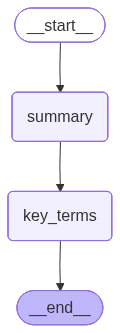

In [29]:
graph=StateGraph(info)
graph.add_node("summary", generate_summary)
graph.add_node("key_terms", generate_key_terms)

graph.add_edge(START, "summary")
graph.add_edge("summary", "key_terms")
graph.add_edge("key_terms", END)

checkpoint_saver = InMemorySaver()
graph.compile(checkpointer=checkpoint_saver)

In [30]:
config1={"configurable":{"thread_id":"first_thread"}}
workflow= graph.compile(checkpointer=checkpoint_saver)
final_state= workflow.invoke({"topic": "Artificial Intelligence"},config=config1)

RateLimitError: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}